### A. CREACIÓN DE VARIABLES OBJETIVO

In [300]:
import pandas as pd

# Abrimos el fichero anterior de la carpeta
df = pd.read_csv("./data-unsupervised-sentiment-20210819.csv")

In [301]:
# Comprobamos las dimensiones del df
df.shape

(7927, 29)

In [302]:
# Función que hace la media ponderada

def media(num1,num2,num3):
  
  a = 1/5
  b = 1/5
  c = 3/5

  m = a*float(num1) + b*float(num2) + c*float(num3)

  return m

In [303]:
import numpy as np

# Creamos la variable del sentimiento final en base a la media de los anteriores
variables = ['possitivity_textblob','possitivity_vader','possitivity_ibm']
df['sentiment_mean'] = df[variables].apply(np.mean, axis=1)
df[["text","sentiment_mean", "possitivity_textblob", "possitivity_vader", 'possitivity_ibm']]

,text,sentiment_mean,possitivity_textblob,possitivity_vader,possitivity_ibm
0,@Uber_Support hi guys why all my trips this we...,-0.304133,0.000000,0.0000,-0.912398
1,So are we getting Uber eats league 1 or not @S...,0.000000,0.000000,0.0000,0.000000
2,"@footballdaily 2-3 years of Messi, a bit of ca...",-0.184964,-0.333333,0.5859,-0.807459
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,0.597995,0.455000,0.4754,0.863584
4,"Uber's Gopuff partnership, Drizly deal being p...",-0.262792,0.000000,0.0000,-0.788377
...,...,...,...,...,...
7922,"Over 3,800 rides in over 3.5 years one blown t...",-0.140505,0.000000,0.4898,-0.911314
7923,@CoolABADev obviously i will want Messi to suc...,-0.226269,0.114286,-0.0333,-0.759793
7924,"@catekitchen Shit, that’s absolutely a crap si...",-0.648893,-0.250000,-0.7086,-0.988080
7925,Simply don’t take a Uber then dumb ass https:/...,-0.656114,-0.187500,-0.8096,-0.971243


In [304]:
# Limpio los datos que tienen 9999 en la variable possitivity_ibm
# Estos tweets están en idiomas no detectables por la librería 

df.loc[df['possitivity_ibm'] > 1]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,text,created_at,created_at_time,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,user_id,user_name,user_location,user_notificacion,user_followers,user_friends,user_withheld_in_countries,mentions_in_tweet,is_reply,source_device,finished_tweet,status_count,hashtags_text,hastags_indices,hastags_in_tweet,possitivity_textblob,possitivity_vader,possitivity_ibm,sentiment_mean
190,190,296,296,@__rainy12__ Uber ne theka diya h personal dri...,Wed Aug 11,09:15:00,9,No,0,1,NaN,1197803093196303872,yashi_mk,India,False,23,37,[],1,__rainy12__,Twitter Web App,False,1250,[],[],0,0.2,0.0000,9999.0,3333.066667
208,208,329,329,i'm in an uber,Wed Aug 11,09:12:27,9,No,0,1,NaN,1396111086852660992,girlalmightyhry,Ot5 | harry's lane | larrie,False,173,330,[],0,No,Twitter for Android,False,683,[],[],0,0.0,0.0000,9999.0,3333.000000
228,228,382,382,"@NazneenTowhid @BajrangPunia Just Shut up, you...",Wed Aug 11,09:07:57,9,No,0,0,NaN,836633428149878784,Kittu9964,"Hyderabad, India",False,52,81,[],2,NazneenTowhid,Twitter for Android,False,4497,[],[],0,-0.6,0.5900,9999.0,3332.996667
284,284,485,485,@Colombo_Ladyy Uber eats 😬,Wed Aug 11,09:00:02,9,No,0,0,NaN,556861783,Wathmina,NaN,False,516,1387,[],1,Colombo_Ladyy,Twitter for Android,False,5614,[],[],0,0.0,-0.3976,9999.0,3332.867467
292,292,502,502,[DRAW] \n\n📍 Thomas &amp; Uber Cup (18 Agustus...,Wed Aug 11,08:58:23,8,Si,15,0,NaN,1376137421218217984,bingungnama,NaN,False,1,187,[],1,No,Twitter for Android,False,985,[],[],0,0.0,0.0000,9999.0,3333.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,7437,18428,18428,Uber ta horrivel,Mon Aug 09,13:59:39,13,No,0,3,NaN,1111962760349433984,Bruninh88917151,"Campo Grande, Brasil",False,188,251,[],0,No,Twitter for Android,False,5271,[],[],0,0.0,0.0000,9999.0,3333.000000
7442,7442,18451,18451,"@JennaEllisEsq Slow Uber day, jenny?",Mon Aug 09,13:58:42,13,No,0,0,NaN,427916103,BL33DZGR33N,Colorado,False,572,1668,[],1,JennaEllisEsq,Twitter for Android,False,21539,[],[],0,-0.3,0.0000,9999.0,3332.900000
7535,7535,18721,18721,@FerroTV 👏👏👏 $UBER 🚀🚀,Mon Aug 09,13:49:06,13,No,0,0,NaN,28627177,theoldrepublic,Not financial advice. USA,False,243,1178,[],1,FerroTV,Twitter Web App,False,12972,[],[],0,0.0,0.0000,9999.0,3333.000000
7583,7583,18879,18879,@Ty27AV Uber her home tf,Mon Aug 09,13:43:14,13,No,0,1,NaN,1413343110231470080,boirambino,NaN,False,19,96,[],1,Ty27AV,Twitter for iPhone,False,25,[],[],0,0.0,0.0000,9999.0,3333.000000


In [305]:
df = df.drop(df.loc[df['possitivity_ibm'] > 1].index)

In [306]:
# Comprobamos el nuevo df y las medidas del mismo
df.shape

(7809, 30)

### Definición de la variable objetivo

Actualmente ya tenemos definida la variable objetivo.

'sentiment_media' es una variable que especifica el grado de positividad de cada tweet en una escala de -1 a 1 pero, para que sea más claro, estandarizaremos la variable a la escala de 0 a 1. De esta forma podemos definir el grado de positividad como un porcentaje, es decir, el tweet es un X% positivo.

Como nos interesa que la variable objetivo sea categórica, dividiremos en 5 categorias la estandarización anterior, de forma que el tweet se considere:
- Muy negativo: 0 - 0.2
- Negativo: 0.2 - 0.4
- Neutro: 0.4 - 0.6
- Positivo: 0.6 - 0.8
- Muy positivo: 0.8 - 1

Tomando como intervalo cerrado el mayor valor de cada rango, salvo en la primera categoría, que también se incluirá el 0.

In [307]:
# Creamos la escala 

min = -1
max = 1
def scaler(numero):
  result = (numero - min) / (max - min)
  return result

In [308]:
# Normalizamos la variable 'sentiment_media'

df['sentiment_norm'] = df['sentiment_mean'].apply(lambda x: scaler(x))
df[["text",'sentiment_norm',"sentiment_mean", "possitivity_textblob", "possitivity_vader", 'possitivity_ibm']]

,text,sentiment_norm,sentiment_mean,possitivity_textblob,possitivity_vader,possitivity_ibm
0,@Uber_Support hi guys why all my trips this we...,0.347934,-0.304133,0.000000,0.0000,-0.912398
1,So are we getting Uber eats league 1 or not @S...,0.500000,0.000000,0.000000,0.0000,0.000000
2,"@footballdaily 2-3 years of Messi, a bit of ca...",0.407518,-0.184964,-0.333333,0.5859,-0.807459
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,0.798997,0.597995,0.455000,0.4754,0.863584
4,"Uber's Gopuff partnership, Drizly deal being p...",0.368604,-0.262792,0.000000,0.0000,-0.788377
...,...,...,...,...,...,...
7922,"Over 3,800 rides in over 3.5 years one blown t...",0.429748,-0.140505,0.000000,0.4898,-0.911314
7923,@CoolABADev obviously i will want Messi to suc...,0.386865,-0.226269,0.114286,-0.0333,-0.759793
7924,"@catekitchen Shit, that’s absolutely a crap si...",0.175553,-0.648893,-0.250000,-0.7086,-0.988080
7925,Simply don’t take a Uber then dumb ass https:/...,0.171943,-0.656114,-0.187500,-0.8096,-0.971243


In [309]:
# Definimos bins 
# Primer valor de los rangos -> 0
# Valor final de cada rango -> 0.2, 0.4, 0.6, 0.8 y 1
bins = [0, .4, .6, 1.]

# Definimos los nombres para cada categoría
names = ["Negativo", "Neutro", "Positivo"]

# Creamos la variable objetivo categórica
df['sentiment'] = pd.cut(df['sentiment_norm'], bins, labels = names)

In [310]:
# Mostramos los sentimientos obtenidos
df[["text",'sentiment','sentiment_norm',"sentiment_mean", "possitivity_textblob", "possitivity_vader", 'possitivity_ibm']]

,text,sentiment,sentiment_norm,sentiment_mean,possitivity_textblob,possitivity_vader,possitivity_ibm
0,@Uber_Support hi guys why all my trips this we...,Negativo,0.347934,-0.304133,0.000000,0.0000,-0.912398
1,So are we getting Uber eats league 1 or not @S...,Neutro,0.500000,0.000000,0.000000,0.0000,0.000000
2,"@footballdaily 2-3 years of Messi, a bit of ca...",Neutro,0.407518,-0.184964,-0.333333,0.5859,-0.807459
3,@Prashan32439454 @Uber_Support @rameshjoshi80 ...,Positivo,0.798997,0.597995,0.455000,0.4754,0.863584
4,"Uber's Gopuff partnership, Drizly deal being p...",Negativo,0.368604,-0.262792,0.000000,0.0000,-0.788377
...,...,...,...,...,...,...,...
7922,"Over 3,800 rides in over 3.5 years one blown t...",Neutro,0.429748,-0.140505,0.000000,0.4898,-0.911314
7923,@CoolABADev obviously i will want Messi to suc...,Negativo,0.386865,-0.226269,0.114286,-0.0333,-0.759793
7924,"@catekitchen Shit, that’s absolutely a crap si...",Negativo,0.175553,-0.648893,-0.250000,-0.7086,-0.988080
7925,Simply don’t take a Uber then dumb ass https:/...,Negativo,0.171943,-0.656114,-0.187500,-0.8096,-0.971243


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


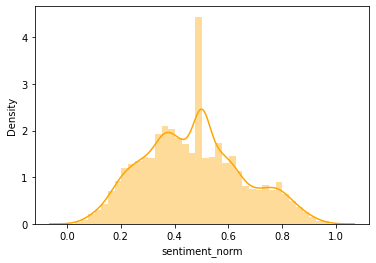

In [311]:
import seaborn as sns
import matplotlib.pyplot as plt

# Representamos con seaborn la variable objetivo para ver las diferentes categorias
numerica = sns.distplot(df['sentiment_norm'], color = 'orange')

In [312]:
# Comprobamos el número de filas que tienen los 3 sentimientos = 0
df.loc[(df['possitivity_textblob']==0.)&(df['possitivity_vader']==0.)&(df['possitivity_ibm']==0.)].shape

(633, 32)

In [313]:
# Comprobamos el número de filas que tienen media sentiment = 0
df.loc[(df['sentiment_mean']==0.)].shape

(633, 32)

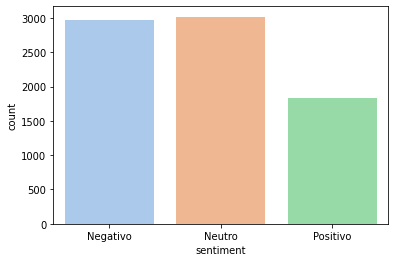

In [314]:
categorica = sns.countplot(x='sentiment', data=df, palette = 'pastel')

In [315]:
df['sentiment'].value_counts()

Neutro      3018
Negativo    2963
Positivo    1828
Name: sentiment, dtype: int64

### B. PRIMEROS MODELOS

In [316]:
df.keys()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'text', 'created_at',
       'created_at_time', 'created_at_hour', 'retweeted', 'retweet_count',
       'favorite_count', 'user_ verified', 'user_id', 'user_name',
       'user_location', 'user_notificacion', 'user_followers', 'user_friends',
       'user_withheld_in_countries', 'mentions_in_tweet', 'is_reply',
       'source_device', 'finished_tweet', 'status_count', 'hashtags_text',
       'hastags_indices', 'hastags_in_tweet', 'possitivity_textblob',
       'possitivity_vader', 'possitivity_ibm', 'sentiment_mean',
       'sentiment_norm', 'sentiment'],
      dtype='object')

In [317]:
# Defino las variables dependientes que eliminaremos del df
vars = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'text', 
        'created_at_time', 'user_name', 'hashtags_text', 'hastags_indices',
        'possitivity_textblob', 'possitivity_vader', 'possitivity_ibm', 
        'sentiment_mean', 'sentiment_norm', 'user_withheld_in_countries']
df_limpio = df.drop(vars,axis=1)

Elimino la variable location hasta que sepamos como limpiarla para que no de tropecientas categorías.

In [318]:
df_limpio['user_location'].value_counts()

Stockholm, Sweden                 225
London, England                   121
United States                      77
Los Angeles, CA                    59
India                              54
                                 ... 
Grounded.                           1
The Office                          1
Hugo, OK                            1
Venezuela of The Middle East.       1
pa carajo                           1
Name: user_location, Length: 2690, dtype: int64

In [319]:
df_limpio = df_limpio.drop(['user_location'],axis=1)

In [320]:
df_limpio.shape

(7809, 17)

In [321]:
df_limpio.dtypes

created_at             object
created_at_hour         int64
retweeted              object
retweet_count           int64
favorite_count          int64
user_ verified        float64
user_id                 int64
user_notificacion        bool
user_followers          int64
user_friends            int64
mentions_in_tweet       int64
is_reply               object
source_device          object
finished_tweet           bool
status_count            int64
hastags_in_tweet        int64
sentiment            category
dtype: object

In [322]:
# Cojo las columnas que son object
# cols = df_limpio[df_limpio.select_dtypes(['object']).columns] 
# cols

In [323]:
# Cambio el tipo a categoría
# df_limpio[cols.keys()] = df_limpio.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [324]:
# df_limpio.dtypes

In [325]:
df_limpio.isna().sum()

created_at              0
created_at_hour         0
retweeted               0
retweet_count           0
favorite_count          0
user_ verified       7809
user_id                 0
user_notificacion       0
user_followers          0
user_friends            0
mentions_in_tweet       0
is_reply                0
source_device           0
finished_tweet          0
status_count            0
hastags_in_tweet        0
sentiment               0
dtype: int64

#### Quitamos categóricas y convertimos en dummies
Para que los modelos funcionen, tenemos que tener las categorías como dummies, sino pueden dar fallos, por ello realizamos la siguiente transformación. 

Para ello es necesario hacer algo de limpieza en las variables categóricas, recategorizar o agrupar categorías. Estudiamos las clases de las variables categóricas. 

In [326]:
# Vemos el resumen de las categóricas
df_limpio.select_dtypes(['object']).keys()

Index(['created_at', 'retweeted', 'is_reply', 'source_device'], dtype='object')

In [327]:
df_limpio[['created_at']].value_counts()

created_at
Mon Aug 09    5827
Wed Aug 11    1982
dtype: int64

In [328]:
df_limpio[['retweeted']].value_counts()

retweeted
No           6325
Si           1484
dtype: int64

In [329]:
df_limpio[['is_reply']].value_counts()

is_reply       
No                 4181
Uber_Support        237
Uber                101
Uber_Kryptonian      59
joncoopertweets      39
                   ... 
caz_000               1
cbundy711             1
ccbx22                1
ccgr8_                1
0510Kels              1
Length: 2548, dtype: int64

In [330]:
# Cambio is_reply a una variable binaria (Si reply o No o Uber, porque nos interesa)

cond1 = df_limpio['is_reply'].isin(['No','Uber_Support','Uber'])
df_limpio['is_reply'] = df_limpio['is_reply'].where(cond1,'Si')

In [331]:
df_limpio[['is_reply']].value_counts()

is_reply    
No              4181
Si              3290
Uber_Support     237
Uber             101
dtype: int64

In [332]:
# Uno categorías Uber_support y Uber
cond2 = df_limpio['is_reply'].isin(['Si','No','Uber'])
df_limpio['is_reply'] = df_limpio['is_reply'].where(cond2,'Uber')

In [333]:
df_limpio[['is_reply']].value_counts()

is_reply
No          4181
Si          3290
Uber         338
dtype: int64

In [334]:
df_limpio[['source_device']].value_counts()

source_device      
Twitter for iPhone     3408
Twitter for Android    1843
Twitter Web App        1254
Sprinklr                523
test-shield-bot         223
                       ... 
True Anthem               1
Tweepsmap                 1
Tweetlogix                1
Twitter for  iPhone       1
Abbie's Research          1
Length: 152, dtype: int64

In [335]:
# Creamos 5 categorías, las 4 más representadas y 'Otros'
# Uno categorías Uber_support y Uber
cond3 = df_limpio['source_device'].isin(['Twitter for iPhone','Twitter for Android',
                                         'Twitter Web App','Sprinklr'])
df_limpio['source_device'] = df_limpio['source_device'].where(cond3,'Otro')

In [336]:
df_limpio[['source_device']].value_counts()

source_device      
Twitter for iPhone     3408
Twitter for Android    1843
Twitter Web App        1254
Otro                    781
Sprinklr                523
dtype: int64

In [337]:
# Seleccionamos las variables categoricas

# categories = df_limpio.select_dtypes(['object']).keys()
# categories

In [338]:
# Convertimos las categoricas en dummies eliminando una categoría (no linealidad)

# dummies = pd.get_dummies(df_limpio[categories],drop_first=True)
# dummies

In [339]:
# Creo el df cambiando las variables object por las dummies

# df_dummies = df_limpio.drop(categories,axis=1)
# df_dummies.dtypes

Me he dado cuenta de que tenemos dos variables booleanas, así que voy a crear dummies de esas dos antes de añadir todas las dummies de las categóricas, porque seguro que con los bool tbn tenemos fallos en los modelos.

In [340]:
# Seleccionamos las variables bool

# booleanas = df_limpio.select_dtypes(['bool']).keys()
# booleanas

In [341]:
# df_limpio[['user_notificacion']].value_counts()

In [342]:
# df_limpio[['finished_tweet']].value_counts()

In [343]:
# Convertimos las booleanas en dummies eliminando una categoría (no linealidad)

# dummies_bool = pd.get_dummies(df_limpio[booleanas],drop_first=True)
# dummies_bool

In [344]:
# No hace falta añadir las dummies booleanas porque solo hay una categoría en todas
# Añado las dummies de las categóricas a df_dummies que tenía solo las num

# df_dummies[dummies.keys()] = dummies
# df_dummies

#### MODELO 1

Hemos eliminado las variables que son linealmente dependientes o que tienen relación con otras de la bbdd. Además, hemos comprobado el número de nan que hay en cada variable. Simplemente hemos comprobado los NaN ya que la limpieza de la bbdd será posterior. 

Observamos que la verificación del usuario es nula en todos los casos, por lo que no creemos que esta info aporte nada al modelo que vamos a realizar. Igualmente, metemos esta variable al primer modelo para comprobar (productivizar un modelo) si el modelo mejora cuando le quitamos los NaN. 

Además vemos que la variable que especifica la localización tiene un alto número de NaN. Tendremos que estudiar en la limpieza como imputar o como utilizar esta variable. De momento, la metemos al modelo tal y como aparece.

In [345]:
df_limpio

,created_at,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,user_id,user_notificacion,user_followers,user_friends,mentions_in_tweet,is_reply,source_device,finished_tweet,status_count,hastags_in_tweet,sentiment
0,Wed Aug 11,9,Si,1,0,NaN,1137383922843771008,False,20504,98,2,No,Otro,False,695888,0,Negativo
1,Wed Aug 11,9,No,0,0,NaN,528288653,False,2733,970,1,No,Twitter Web App,False,58398,0,Neutro
2,Wed Aug 11,9,No,0,0,NaN,826917817,False,353,943,1,Si,Twitter for iPhone,False,5974,0,Neutro
3,Wed Aug 11,9,No,0,0,NaN,1382729072837479936,False,6,1,3,Si,Twitter for Android,False,169,0,Positivo
4,Wed Aug 11,9,No,0,0,NaN,3646985662,False,5562,3,0,No,Otro,False,113083,0,Negativo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922,Mon Aug 09,13,No,0,0,NaN,1246194059477212928,False,0,4,0,Si,Twitter for iPhone,False,21,0,Neutro
7923,Mon Aug 09,13,No,0,1,NaN,905863719233708032,False,477,435,1,Si,Twitter for iPhone,False,5828,0,Negativo
7924,Mon Aug 09,13,No,0,2,NaN,46914533,False,3215,4690,1,Si,Otro,False,29551,0,Negativo
7925,Mon Aug 09,13,No,0,0,NaN,1278897747538726912,False,409,870,0,No,Twitter for iPhone,False,54109,0,Negativo


Nos damos cuenta de que no tiene sentido meter id, y la eliminamos del df.

In [346]:
df_limpio = df_limpio.drop(['user_id'],axis=1)

In [347]:
df_limpio

,created_at,created_at_hour,retweeted,retweet_count,favorite_count,user_ verified,user_notificacion,user_followers,user_friends,mentions_in_tweet,is_reply,source_device,finished_tweet,status_count,hastags_in_tweet,sentiment
0,Wed Aug 11,9,Si,1,0,NaN,False,20504,98,2,No,Otro,False,695888,0,Negativo
1,Wed Aug 11,9,No,0,0,NaN,False,2733,970,1,No,Twitter Web App,False,58398,0,Neutro
2,Wed Aug 11,9,No,0,0,NaN,False,353,943,1,Si,Twitter for iPhone,False,5974,0,Neutro
3,Wed Aug 11,9,No,0,0,NaN,False,6,1,3,Si,Twitter for Android,False,169,0,Positivo
4,Wed Aug 11,9,No,0,0,NaN,False,5562,3,0,No,Otro,False,113083,0,Negativo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922,Mon Aug 09,13,No,0,0,NaN,False,0,4,0,Si,Twitter for iPhone,False,21,0,Neutro
7923,Mon Aug 09,13,No,0,1,NaN,False,477,435,1,Si,Twitter for iPhone,False,5828,0,Negativo
7924,Mon Aug 09,13,No,0,2,NaN,False,3215,4690,1,Si,Otro,False,29551,0,Negativo
7925,Mon Aug 09,13,No,0,0,NaN,False,409,870,0,No,Twitter for iPhone,False,54109,0,Negativo


In [348]:
from sklearn.model_selection import train_test_split

# Dividimos la muestra en train y test

X = df_limpio.drop(['sentiment'],axis=1)
y = df_limpio['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [349]:
X_train.dtypes

created_at            object
created_at_hour        int64
retweeted             object
retweet_count          int64
favorite_count         int64
user_ verified       float64
user_notificacion       bool
user_followers         int64
user_friends           int64
mentions_in_tweet      int64
is_reply              object
source_device         object
finished_tweet          bool
status_count           int64
hastags_in_tweet       int64
dtype: object

In [350]:
y_train.dtypes

CategoricalDtype(categories=['Negativo', 'Neutro', 'Positivo'], ordered=True)

In [351]:
# Creamos una función para comparar los resultados en boxplot

def boxplots_algorithms(results, names):
    
    plt.figure(figsize=(8,8))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.show()

In [352]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Modelos que utilizaremos

models = []
models.append(('LR', LogisticRegression(random_state=12345)))
models.append(('RFC', RandomForestClassifier(random_state=12345)))
models.append(('SVM', SVC()))

In [353]:
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [354]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer

# Creamos un One Hot Encoder que nos ayude a dummificar las nuevas entradas
# de las variables categóricas que incluyamos

col_transformer = ColumnTransformer([
    ('created_at', OneHotEncoder(drop='first'), ['created_at']),
    ('retweeted', OneHotEncoder(drop='first'), ['retweeted']), 
    ('is_reply', OneHotEncoder(drop='first'), ['is_reply']), 
    ('source_device', OneHotEncoder(drop='first'), ['source_device'])
])

LR: 0.447818 (0.012214)
RFC: 0.449868 (0.018418)
SVM: 0.449611 (0.019245)


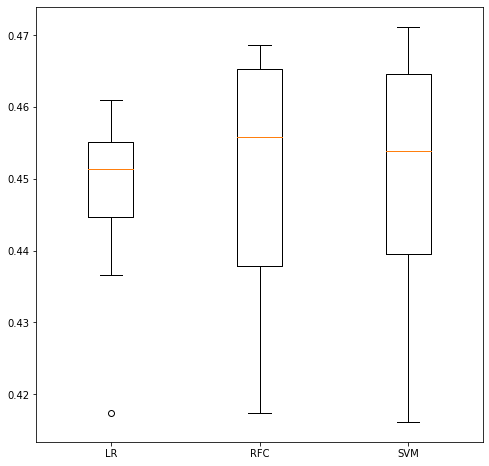

In [355]:
""" Realizad un bucle que calcule, para cada modelo,
    - OneHotEncoder para nuevos datos
    - Evaluación del modelo
    - Una validación cruzada:
        1. Tipo KFolds, con 10 splits 
        2. Aleatorio con semilla y,
        3. scoring='accuracy'
     Usaremos la función boxplots_algorithms para plotear los resultados """

results = []
names = []

for name, model in models:

    pipeline = make_pipeline(col_transformer, model)
    pipeline = pipeline.fit(X_train, y_train) 
    
    cv_technique = KFold(n_splits=10, shuffle=True, random_state=12345)
    cv_results = cross_val_score(pipeline, X, y, cv=cv_technique, scoring ='accuracy')
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    results.append(cv_results)
    names.append(name)
    
boxplots_algorithms(results, names)

In [239]:
# import sklearn
# sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

### C. Tuneado del mejor modelo y resultados en test

Ahora voy a probar con regresión porque me parece el más robusto (MJ). Voy a tunearlo y sacar las predicciones de test, para ver si es un 'buen' modelo para datos no entrenados.

Al final hacemos RandomForest porque Regresión no se tunea, luego sacamos predicciones de ambos.

In [356]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Tuneado forest

param_grid = { 
    'model__n_estimators': [10, 20], # Número de árboles
    'model__max_features': ['auto', 'sqrt', 'log2'], # Máximo de particiones para cada nodo
    'model__max_depth' : [4,5,6,7,8], # Número máximo de niveles en cada árbol
    'model__criterion' :['gini', 'entropy']
}

modelo = RandomForestClassifier()

pipeline = Pipeline([('transformacion_columna', col_transformer),
                     ('model', modelo)])

cv_technique = KFold(n_splits=10, shuffle=True, random_state=12345)
grid_model = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv_technique)
grid_model.fit(X_train, y_train)

print(grid_model.best_score_)
print(grid_model.best_estimator_)

0.44877453442352894
Pipeline(memory=None,
         steps=[('transformacion_columna',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('created_at',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['created_at']),
                                                 ('retweeted',
                                                  OneHotEncoder(categories='auto',
                                

In [362]:
ganador_rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=4, max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=20, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False)

pipe = Pipeline([('transformacion_columna', col_transformer),
                 ('model', ganador_rf)])
pipe = pipe.fit(X_train, y_train)

In [377]:
prediccion_rf = pipe.predict(X_test)

In [385]:
accuracy_rf = (prediccion_rf == y_test).value_counts()/y_test.shape[0]

In [388]:
accuracy_rf[1]

0.4579598804950918

In [398]:
ganador_lr = LogisticRegression()

pipe2 = Pipeline([('transformacion_columna', col_transformer),
                 ('model', ganador_lr)])
pipe2 = pipe2.fit(X_train, y_train)

In [399]:
prediccion_lr = pipe2.predict(X_test)

In [400]:
accuracy_lr = (prediccion_lr == y_test).value_counts()/y_test.shape[0]

In [401]:
accuracy_lr[1]

0.4579598804950918